# Decision Tree

A Decision Tree is one of the popular and powerful machine learning algorithms that I have learned. It is a non-parametric supervised learning method that can be used for both classification and regression tasks. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. For a classification model, the target values are discrete in nature, whereas, for a regression model, the target values are represented by continuous values. Unlike the black box type of algorithms such as Neural Network, Decision Trees are comparably easier to understand because it shares internal decision-making logic (you will find details in the following session).

Despite the fact that many data scientists believe it’s an old method and they may have some doubts of its accuracy due to an overfitting problem, the more recent tree-based models, for example, Random forest (bagging method), gradient boosting (boosting method) and XGBoost (boosting method) are built on the top of decision tree algorithm. Therefore, the concepts and algorithms behind Decision Trees are strongly worth understanding!

There are *four* popular types of decision tree algorithms: 

1. **ID3**
2. **CART (Classification And Regression Trees)**
3. **Chi-Square**
4. **Reduction in Variance**

In this class, we'll focus on the classification trees and the explanations of **CART (Classification And Regression Trees)**.

**Example:**

>You play golf every Sunday and you invite your best friend, Arthur to come with you every time. Arthur sometimes comes to join but sometimes not. For him, it depends on a number of factors for example, **Weather**, **Temperature**, **Humidity** and **Wind**. We'll use the dataset of last two week to predict whether or not Arthur will join you to play golf. An intuitive way to do this is through a Decision Tree.



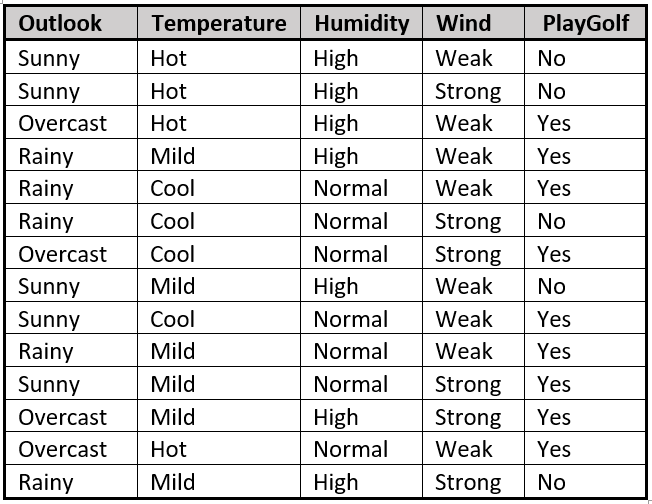

In [ ]:
from IPython.display import Image, display
display(Image('playgolf.png',width=500, height=500))
#display(Image('2.png'))


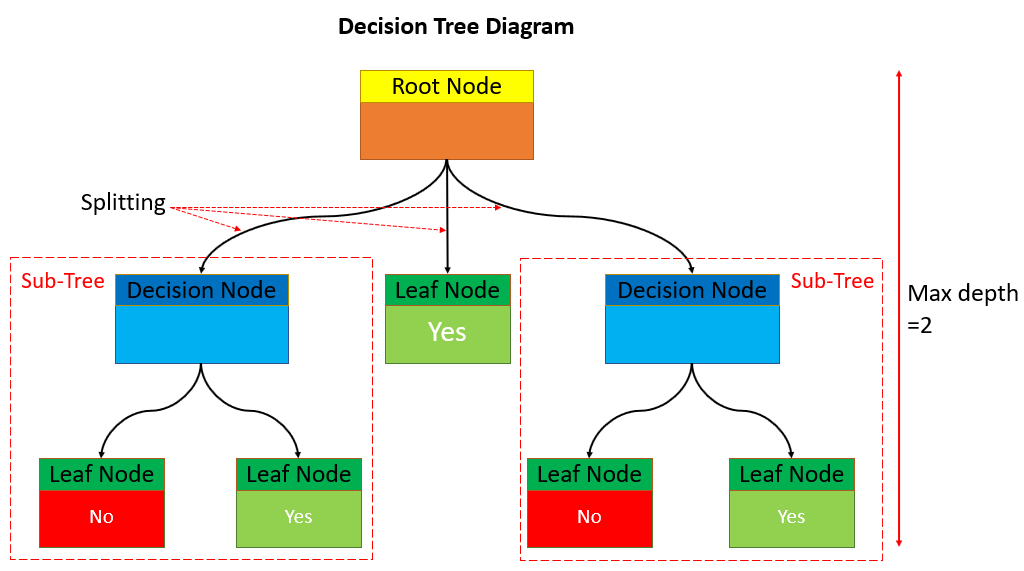

In [ ]:
display(Image('dt0.png',width=500, height=500))


* **Root Node:** 
    - The attribute that best classifies the training data, use this attribute at the root of the tree. 
    - The first split which decides the entire population or sample data should further get divided into two or more homogeneous sets.
    
* **Splitting:** It is a process of dividing a node into two or more *sub-nodes*.

>**Question:** Base on which attribute (feature) to split? What is the best split?

>**Answer:** Use the attribute with the highest **Information Gain** or **Gini Gain**

* **Decision Node:** This node decides whether/when a *sub-node* splits into further sub-nodes or not.

* **Leaf:** Terminal Node that predicts the outcome (categorical or continues value). The *coloured nodes*, i.e., *Yes* and *No* nodes, are the leaves.

## CART (Classification and Regression Tree)

ID3 uses information gain whereas C4.5 uses gain ratio for splitting. Here, CART is an alternative decision tree building algorithm. It can handle both classification and regression tasks. CART algorithm uses a new metric named gini index to create decision points for classification tasks. Specifically, CART uses the Gini method to create split points including Gini Index (Gini Impurity) and Gini Gain.

We will mention a step by step CART decision tree example by hand from scratch.

>**Question:** What is **“Gini Index”**? and What is its function?

>**Answer:** Gini index is a metric for classification tasks in CART. It stores sum of squared probabilities of each class. We can formulate it as illustrated below.

1. Compute the Gini Index for each attribute/feature values: **Gini (Attribute='value')** 
\begin{align}
\mathbf{Gini (Attribute=value) = Gini(Av)}& =1- \sum_{i=1}^c {p_i}^2.\\
 & {where\:i\:=1\:to \:number \:of \:classes}
\end{align}

 
2. Compute the weighted sum of Gini Indexes for attribute/feature **Gini (Attribute)**
\begin{align}
Gini (Attribute) & = ∑_{v} {p_{v}} * Gini(Av) \\ 
    &{where \:v = \:values \:of \:attribute/feature}
\end{align}   
3. Pick the **Lowest Gini Index Attribute**.

4. **Repeat** until we get the tree we desired.

After calculating Gini Gain for every attribute, **`sklearn.tree.DecisionTreeClassifier`** will choose attribute with the **largest Gini Gain** as the Root Node. A branch with Gini of 0 is a leaf node while a branch with Gini more than 0 needs further splitting. Nodes are grown recursively until all data is classified (see the detail below).

### Dataset

We will work on same **[playgolf](https://github.com/milaan9/Python_Decision_Tree_and_Random_Forest/blob/main/dataset/playgolf_data.csv)** dataset in **[ID3](https://github.com/milaan9/Python_Decision_Tree_and_Random_Forest/blob/main/001_Decision_Tree_PlayGolf_ID3.ipynb)**. There are 14 instances of golf playing decisions based on **Outlook**, **Temperature**, **Humidity** and **Wind** factors. 



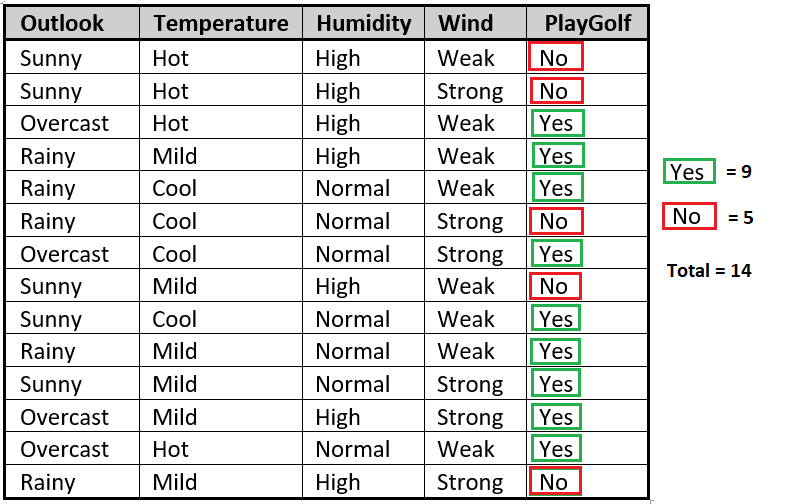

In [ ]:
display(Image('CARTpg.png',width=500, height=500))

### 1. Calculate Gini Index for each Attribute of Dataset

### Gini Index for each Attribute: (let say Outlook)

#### Calculate Gini Index for each Values, i.e for 'Sunny', 'Rainy' and 'Overcast'.

| Outlook   | PlayGolf |   | Outlook   | PlayGolf |   | Outlook      | PlayGolf |
|:---------:|:--------:|:---:|:---------:|:--------:|:---:|:------------:|:--------:|
| **Sunny** | **No**❌ | \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **No**❌ | \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **No**❌ | \|  | **Rainy** | **No**❌ | \|  | **Overcast** | **Yes**✅|
| **Sunny** | **Yes**✅| \|  | **Rainy** | **Yes**✅| \|  | **Overcast** | **Yes**✅|
| **Sunny** | **Yes**✅| \|  | **Rainy** | **No**❌ | \|  |              |           |

| Outlook      | Yes  | No    | Total |
|:------------ |:----:|:-----:|:-----:|
| **Sunny**    |**2** | **3** | **5** |
| **Overcast** |**4** | **0** | **4** |
| **Rainy**    |**3** | **2** | **5** |
| **Total**    |**10**| **4** | **14** |

1. Calculate Gini Index(Outlook='Value'):

$$ Gini(Outlook = Sunny) = 1 - {\Big(\frac{2}{5}\Big)}^2 - {\Big(\frac{3}{5}\Big)}^2 = 0.48 $$

➡$$ Gini(Outlook = Overcast) = 1 -  {\Big(\frac{4}{4}\Big)}^2 - {\Big(\frac{0}{4}\Big)}^2 = 0 $$

➡$$ Gini(Outlook = Rainy) = 1 -  {\Big(\frac{3}{5}\Big)}^2 - {\Big(\frac{2}{5}\Big)}^2 = 0.48 $$

2. Calculate weighted sum of Gini indexes for Outlook attribute.

$$ Gini(Outlook) = \frac{5}{14} * (0.48) + \frac{4}{14} * (0) + \frac{5}{14} * (0.48) = 0.3429 $$

### 2. Gini Index for each Attribute: (let say Temperature)

#### Calculate Gini Index for each Values, i.e for 'Hot', 'Mild' and 'Cool'.

| Temperature | PlayGolf |   | Temperature | PlayGolf |   | Temperature | PlayGolf |
|:-----------:|:--------:|:---:|:-----------:|:--------:|:---:|:-----------:|:--------:|
| **Hot** | **No**❌     | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
| **Hot** | **No**❌     | \|  | **Mild**  | **No**❌   | \|  | **Cool** | **No**❌   |
| **Hot** | **Yes**✅    | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
| **Hot** | **Yes**✅    | \|  | **Mild**  | **Yes**✅  | \|  | **Cool** | **Yes**✅  |
|         |               | \|  | **Mild**  | **Yes**✅  | \|  |          |          |
|         |               | \|  | **Mild**  | **No**❌   | \|  |          |          |

| Temperature | Yes  | No    | Total |
|:------------|:----:|:-----:|:-----:|
| **Hot**   |**2** | **2** | **4** |
| **Mild**  |**4** | **2** | **6** |
| **Cool**  |**3** | **1** | **4** |
| **Total** |**9** | **5** | **14** |

1. Calculate Gini Index(Temperature='Value'):

$$ Gini(Temperature = Hot) = 1 - {\Big(\frac{2}{4}\Big)}^2 - {\Big(\frac{2}{4}\Big)}^2 = 0.5 $$

➡$$ Gini(Temperature = Mild) = 1 -  {\Big(\frac{4}{6}\Big)}^2 - {\Big(\frac{2}{6}\Big)}^2 = 0.445 $$

➡$$ Gini(Temperature = Cool) = 1 -  {\Big(\frac{3}{4}\Big)}^2 - {\Big(\frac{1}{4}\Big)}^2 = 0.375 $$

2. Calculate weighted sum of Gini indexes for Temperature attribute.

$$ Gini(Temperature) = \frac{4}{14} * (0.5) + \frac{6}{14} * (0.445) + \frac{4}{14} * (0.48) = 0.439 $$

### Gini Index for each Attribute: (let say Humidity)

#### Calculate Gini Index for each Values, i.e for 'Normal' and 'High'.

| Humidity | PlayGolf |   | Humidity | PlayGolf | 
|:--------:|:--------:|:---:|:--------:|:--------:|
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 
| **Normal** | **No**❌  | \|  | **High** | **No**❌  | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 
| **Normal** | **Yes**✅ | \|  | **High** | **Yes**✅ | 
| **Normal** | **Yes**✅ | \|  | **High** | **No**❌  | 

| Humidity  | Yes  | No    | Total |
|:----------|:----:|:-----:|:-----:|
| **Normal**|**6** | **1** | **7** |
| **High**  |**3** | **4** | **7** |
| **Total** |**9** | **5** | **14** |

1. Calculate Gini Index(Humidity='Value'):

$$ Gini(Humidity = Normal) = 1 - {\Big(\frac{6}{7}\Big)}^2 - {\Big(\frac{1}{7}\Big)}^2 = 0.244 $$

➡$$ Gini(Humidity = High) = 1 -  {\Big(\frac{3}{7}\Big)}^2 - {\Big(\frac{4}{7}\Big)}^2 = 0.489 $$

2. Calculate weighted sum of Gini indexes for Humidity attribute.

$$ The Gini(Humidity) = \frac{7}{14} * (0.244) + \frac{7}{14} * (0.489) = 0.367 $$

### Gini Index for each Attribute: (let say Wind)

#### Calculate Gini Index for each Values, i.e for 'Weak' and 'Strong'.

| Wind     | PlayGolf |   | Wind | PlayGolf | 
|:--------:|:--------:|:---:|:--------:|:--------:|
| **Weak** | **No**❌  | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **No**❌  | \|  | **Strong** | **Yes**✅ | 
| **Weak** | **Yes**✅ | \|  | **Strong** | **No**❌  | 
| **Weak** | **Yes**✅ | \|  |            |         | 
| **Weak** | **Yes**✅ | \|  |            |         | 

| Wind   | Yes  | No    | Total |
|:-------|:----:|:-----:|:-----:|
| **Weak**  |**6** | **2** | **8** |
| **Strong**|**3** | **3** | **6** |
| **Total** |**9** | **5** | **14** |

1. Calculate Gini Index(Wind='Value'):

$$ Gini(Wind = Weak) = 1 - {\Big(\frac{6}{8}\Big)}^2 - {\Big(\frac{2}{8}\Big)}^2 = 0.375 $$

➡$$ Gini(Wind = Strong) = 1 - {\Big(\frac{3}{6}\Big)}^2 - {\Big(\frac{3}{6}\Big)}^2 = 0.5 $$

2. Calculate weighted sum of Gini indexes for Wind attribute.

$$ The Gini(Wind) = \frac{8}{14} * (0.375) + \frac{6}{14} * (0.5) = 0.428 $$

### 2. Select Root Node of Dataset

We’ve calculated Gini Index values for each feature. The winner will be **Outlook** attribute because its cost is the lowest (lowest Gini Index value). That's why, outlook decision will appear in the root node of the tree.

|    Attributes   | Gini Index |             | 
|:----------------|:----------:|:-----------:|
| **Outlook**     | **0.342**  |⬅️ Root node |
| **Temperature** | **0.439**  |             |
| **Humidity**    | **0.367**  |             |
| **Wind**        | **0.428**  |             |



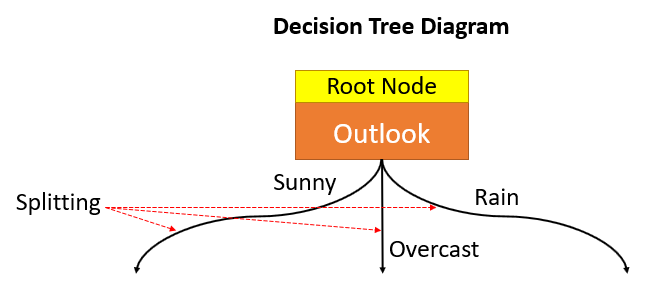

In [ ]:
display(Image('dt1.png'))

### 3. Calculate Gini Index for each Attribute when Outlook is Sunny

Now, we need to test dataset for custom subsets of **Outlook** attribute.

You might realize that sub dataset in the **Overcast** leaf has only **Yes** decisions. This means that **Overcast** leaf is over.

**Outlook = Overcast**

| Outlook | Temperature | Humidity | Wind  | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Overcast** | **Hot**  | **High**   | **Weak**   | **Yes**  | ✅ |
| **Overcast** | **Cool** | **Normal** | **Strong** | **Yes**  | ✅ |
| **Overcast** | **Mild** | **High**   | **Weak**   | **Yes**  | ✅ |
| **Overcast** | **Hot**  | **Normal** | **Strong** | **Yes**  | ✅ |

Basically, decision will always be **Yes** if outlook were **Overcast**.



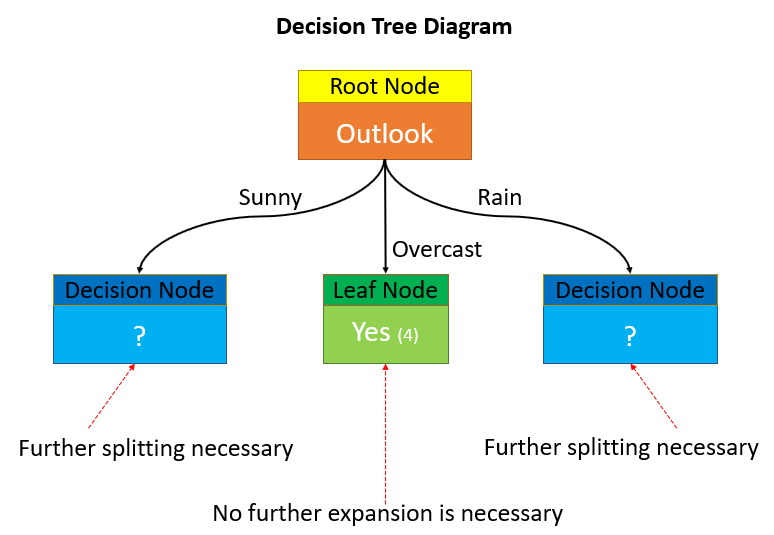

In [ ]:
display(Image('dt2.png',width=500, height=400))

We will apply same principles to those sub datasets in the following steps.

Focus on the sub-dataset for **Sunny** **Outlook**. We need to find the Gini Index scores for **Temperature**, **Humidity** and **Wind** attributes respectively.

**Outlook = Sunny**

| Outlook | Temperature | Humidity | Wind  | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Sunny** | **Hot**  | **High**   | **Weak**   | **No**  | ❌ |
| **Sunny** | **Hot**  | **High**   | **Strong** | **No**  | ❌ | 
| **Sunny** | **Mild** | **High**   | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Cool** | **Normal** | **Weak**   | **Yes** | ✅ | 
| **Sunny** | **Mild** | **Normal** | **Strong** | **Yes** | ✅ | 

### Gini Index for each Attribute(let say Temperature) for Sunny Outlook

#### Calculate Gini Index for each Temperature, i.e for Cool', 'Hot' and 'Mild' for Sunny Outlook.

| Outlook |  Temperature | PlayGolf |    |
|:-------:|--------:|--------:|:--------:|
| **Sunny** | **Cool** | **Yes** | ✅ |
| **Sunny** | **Hot**  | **No**  | ❌ | 
| **Sunny** | **Hot**  | **No**  | ❌ | 
| **Sunny** | **Mild** | **No**  | ❌ | 
| **Sunny** | **Mild** | **Yes** | ✅ |

| Temperature | Yes  | No    | Total |
|:------------|:----:|:-----:|:-----:|
| **Hot**   | **0**  | **2** | **2** |
| **Mild**  | **1**  | **1** | **2** |
| **Cool**  | **1**  | **0** | **1** |
| **Total** | **2**  | **3** | **5** |

1. Calculate Gini Index(Outlook=Sunny|Temperature='value'):

$$ Gini(Outlook=Sunny|Temperature=Hot) = 1 - {\Big(\frac{0}{2}\Big)}^2 - {\Big(\frac{2}{2}\Big)}^2 = 0 $$

➡$$ Gini(Outlook=Sunny|Temperature=Mild) = 1 - {\Big(\frac{1}{2}\Big)}^2 - {\Big(\frac{1}{2}\Big)}^2 = 0.5 $$

➡$$ Gini(Outlook=Sunny|Temperature=Cool) = 1 - {\Big(\frac{1}{1}\Big)}^2 - {\Big(\frac{0}{1}\Big)}^2 = 0 $$

2. Calculate weighted sum of Gini indexes for Outlook=Sunny|Temperature attribute.

$$ Gini(Outlook=Sunny|Temperature) = \frac{2}{5} * (0) + \frac{2}{5} * (0.5) + \frac{1}{5} * (0) = 0.2 $$

### Gini Index for each Attribute(let say Humidity) for Sunny Outlook

Calculate Gini Index for each Humidity, i.e for 'High' and 'Normal' for Sunny Outlook.

| Outlook   |  Humidity   | PlayGolf |   |
|:-----  --:|-------   -:|--------:|:---:|
| **Sunny** | **High**   | **No**  | ❌ |
| **Sunny** | **High**   | **No**  | ❌ | 
| **Sunny** | **High**   | **No**  | ❌ | 
| **Sunny** | **Normal** | **Yes** | ✅ | 
| **Sunny** | **Normal** | **Yes** | ✅ |

| Humidity   | Yes  | No    | Total |
|:-----------|:----:|:-----:|:-----:|
| **Normal** | **2**  | **0** | **2** |
| **High**   | **0**  | **3** | **3** |
| **Total**  | **2**  | **3** | **5** |

1. Calculate Gini Index(Outlook=Sunny|Humidity='value'):

$$ Gini(Outlook=Sunny|Humidity=Normal) = 1 - {\Big(\frac{2}{2}\Big)}^2 - {\Big(\frac{0}{2}\Big)}^2 = 0 $$

➡$$ Gini(Outlook=Sunny|Humidity=High) = 1 - {\Big(\frac{0}{3}\Big)}^2 - {\Big(\frac{3}{3}\Big)}^2 = 0 $$

2. Calculate weighted sum of Gini indexes for Outlook=Sunny|Humidity attribute.

$$ Gini(Outlook=Sunny|Humidity) = \frac{2}{5} * (0) + \frac{3}{5} * (0) = 0 $$

### Gini Index for each Attribute(let say Wind) for Sunny Outlook

Calculate Gini Index for each Wind, i.e for 'Strong' and 'Weak' for Sunny Outlook.

| Outlook |  Wind   |PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Sunny** | **Strong** | **No**  | ❌ |
| **Sunny** | **Strong** | **Yes** | ✅ | 
| **Sunny** | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Weak**   | **No**  | ❌ | 
| **Sunny** | **Weak**   | **Yes** | ✅ |

| Wind       | Yes  | No    | Total |
|:-----------|:----:|:-----:|:-----:|
| **Weak**   | **1**  | **2** | **3** |
| **Strong** | **1**  | **1** | **2** |
| **Total**  | **2**  | **3** | **5** |

1. Calculate Gini Index(Outlook=Sunny|Wind='value'):

$$ Gini(Outlook=Sunny|Wind=Weak) = 1 - {\Big(\frac{1}{3}\Big)}^2 - {\Big(\frac{2}{3}\Big)}^2 = 0.266 $$

➡$$ Gini(Outlook=Sunny|Wind=Strong) = 1 - {\Big(\frac{1}{2}\Big)}^2 - {\Big(\frac{1}{2}\Big)}^2 = 0.2 $$

2. Calculate weighted sum of Gini indexes for Outlook=Sunny|Wind attribute.

$$ Gini(Outlook=Sunny|Wind) = \frac{3}{5} * (0.266) + \frac{2}{5} * (0.2) = 0.466 $$

### 4. Select Root Node of Sub-Dataset when Outlook is Sunny

Decision for **Sunny** **Outlook**

We’ve calculated Gini Index values for attribute when Outlook is Sunny. The winner will be **Humidity** attribute because its cost is the lowest (lowest Gini Index value). That's why, **Humidity** decision will appear in the next node of the Sunny.

|    Attributes   |    Gain   |           |
|:----------------|:---------:|:---------:|
| **Temperature** | **0.2**   |           |
| **Humidity**    | **0**     | ⬅️ Root node|
| **Wind**        | **0.466** |           |

Also, decision is always **No** for High Humidity and Sunny Outlook. On the other hand, decision will always be **Yes** for normal Humidity and Sunny Outlook. This branch is over.



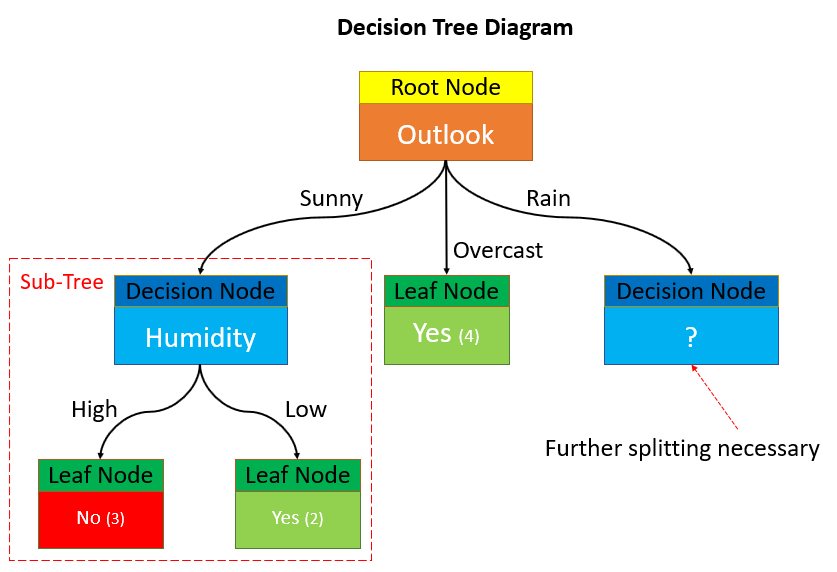

In [ ]:
display(Image('dt3.png',width=500, height=400))

### 5. Calculate Gini Index for each Attribute when Outlook is Rainy

Now, we need to focus on **Rainy** **Outlook**.

Focus on the sub-dataset for **Rainy** **Outlook**. We need to find the Gini Index scores for **Temperature**, **Humidity** and **Wind** attributes respectively.

**Outlook = Rainy**

| Outlook | Temperature | Humidity | Wind  | PlayGolf |          |
|:-------:|:-----------:|:--------:|:-----:|:--------:|:--------:|
| **Rainy** | **Mild**  | **High**   | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Cool**  | **Normal** | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Cool**  | **Normal** | **Strong** | **No**  | ❌ |
| **Rainy** | **Mild**  | **Normal** | **Weak**   | **Yes** | ✅ |
| **Rainy** | **Mild**  | **High**   | **Strong** | **No**  | ❌ |

### Gini Index for each Attribute(let say Temperature) for Rainy Outlook

#### Calculate Gini Index for each Temperature, i.e for Cool', 'Hot' and 'Mild' for Rainy Outlook.


| Outlook | Temperature | PlayGolf |          |
|:-------:|:-----------:|:--------:|:--------:|
| **Rainy** | **Mild** | **Yes** | ✅ |
| **Rainy** | **Cool** | **Yes** | ✅ | 
| **Rainy** | **Cool** | **No**  | ❌ | 
| **Rainy** | **Mild** | **Yes** | ✅ | 
| **Rainy** | **Mild** | **No**  | ❌ |

| Temperature | Yes  | No    | Total |
|:------------|:----:|:-----:|:-----:|
| **Mild**  | **2**  | **1** | **3** |
| **Cool**  | **1**  | **1** | **2** |
| **Total** | **3**  | **2** | **5** |

1. Calculate Gini Index(Outlook=Rainy|Temperature='value'):

$$ Gini(Outlook=Rainy|Temperature=Mild) = 1 - {\Big(\frac{2}{3}\Big)}^2 - {\Big(\frac{1}{3}\Big)}^2 = 0.444 $$

➡$$ Gini(Outlook=Rainy|Temperature=Cool) = 1 - {\Big(\frac{1}{2}\Big)}^2 - {\Big(\frac{1}{2}\Big)}^2 = 0.5 $$

2. Calculate weighted sum of Gini indexes for Outlook=Rainy|Temperature attribute.

$$ Gini(Outlook=Rainy|Temperature) = \frac{3}{5} * (0.444) + \frac{2}{5} * (0.5) + \frac{1}{5} * (0) = 0.466 $$

### Gini Index for each Attribute(let say Humidity) for Rainy Outlook

#### Calculate Gini Index for each Humidity, i.e for 'High' and 'Normal' for Rainy Outlook.

| Outlook |  Humidity | PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Rainy** | **High**   | **Yes** | ✅ |
| **Rainy** | **High**   | **No**  | ❌ | 
| **Rainy** | **Normal** | **Yes** | ✅ | 
| **Rainy** | **Normal** | **No**  | ❌ | 
| **Rainy** | **Normal** | **Yes** | ✅ |

| Humidity   | Yes  | No    | Total |
|:-----------|:----:|:-----:|:-----:|
| **Normal** | **2**  | **1** | **3** |
| **High**   | **1**  | **1** | **2** |
| **Total**  | **3**  | **2** | **5** |

1. Calculate Gini Index(Outlook=Rainy|Humidity='value'):

$$ Gini(Outlook=Rainy|Humidity=Normal) = 1 - {\Big(\frac{2}{3}\Big)}^2 - {\Big(\frac{1}{3}\Big)}^2 = 0.444 $$

➡$$ Gini(Outlook=Rainy|Humidity=High) = 1 - {\Big(\frac{1}{2}\Big)}^2 - {\Big(\frac{1}{2}\Big)}^2 = 0.5 $$

2. Calculate weighted sum of Gini indexes for Outlook=Rainy|Humidity attribute.

$$ Gini(Outlook=Rainy|Humidity) = \frac{3}{5} * (0.444) + \frac{2}{5} * (0.5) = 0.466 $$

### Gini Index for each Attribute(let say Wind) for Rainy Outlook

#### Calculate Gini Index  for each Wind, i.e for 'Strong' and 'Weak' for Rainy Outlook.

| Outlook |  Wind  | PlayGolf |          |
|:-------:|--------:|--------:|:--------:|
| **Rainy** | **Strong** | **No**  | ❌ |
| **Rainy** | **Strong** | **No**  | ❌ | 
| **Rainy** | **Weak**   | **Yes** | ✅ | 
| **Rainy** | **Weak**   | **Yes** | ✅ | 
| **Rainy** | **Weak**   | **Yes** | ✅ |

| Wind       | Yes  | No    | Total |
|:-----------|:----:|:-----:|:-----:|
| **Weak**   | **3**  | **0** | **3** |
| **Strong** | **0**  | **2** | **2** |
| **Total**  | **3**  | **2** | **5** |

1. Calculate Gini Index(Outlook=Rainy|Wind='value'):

$$ Gini(Outlook=Rainy|Wind=Weak) = 1 - {\Big(\frac{3}{3}\Big)}^2 - {\Big(\frac{0}{3}\Big)}^2 = 0 $$

➡$$ Gini(Outlook=Rainy|Wind=Strong) = 1 - {\Big(\frac{0}{2}\Big)}^2 - {\Big(\frac{2}{2}\Big)}^2 = 0 $$

2. Calculate weighted sum of Gini indexes for Outlook=Rainy|Wind attribute.

$$ Gini(Outlook=Rainy|Wind) = \frac{3}{5} * (0) + \frac{2}{5} * (0) = 0 $$

### 6. Select Root Node of Sub-Dataset when Outlook is Rainy

Decision for **Rainy** **Outlook**

We’ve calculated Gini Index values for attribute when Outlook is Rainy. The winner will be **Wind** attribute because its cost is the lowest (lowest Gini Index value). That's why, **Wind** decision will appear in the next node of the Rainy.


|    Attributes   |    Gain   |           |
|:----------------|:---------:|:---------:|
| **Temperature** | **0.466** | |
| **Humidity**    | **0.466** | |
| **Wind**        | **0**     | ⬅️ Root node|

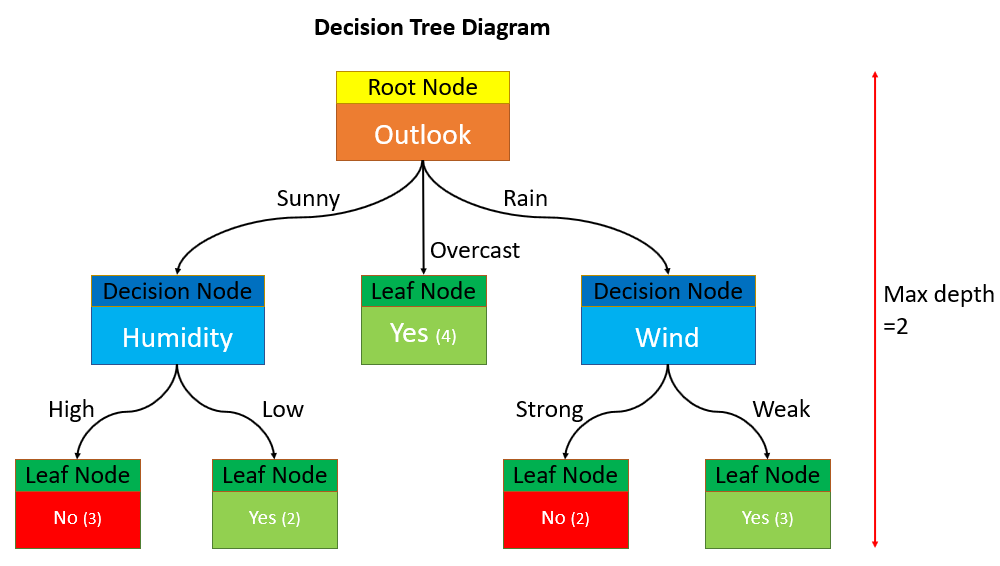

In [ ]:
display(Image('dt.png',width=500, height=400))

Also, decision is always **Yes** when Wind is Weak. On the other hand, decision is always **No** if Wind is Strong. This means that this branch is over.


So, decision tree construction is over. We can use the following rules for decisioning.

>**Question:** so…which should I use? Gini Index or Entropy? 

>**Answer:** Generally the result should be the same… I personally prefer Gini Index becasue it doesn’t involve a more computationally intensive log to calculate. But why not try both.

Let us compare both:

| Training Algorithm | CART (Classification and Regression Tree)| ID3 (Iterative Dichotomiser) |
|:-------------------|:--|:-----|
|**Target(s)** | **Classification and Regression** | **Classification** |
|**Metric** | **Gini Index** | **Entropy function and Information gain** |
|**Constant Function (Based on what to split?)** | **Select its splits to achieve the subsets that minimize Gini Impurity** | **Yield the largest Information Gain for categorical targets** |

## Building a Decision Tree using `scikit-learn`

In [ ]:
# Importing the necessary module!

import numpy as np
import pandas as pd
from sklearn import tree #For our Decision Tree
import pydotplus # To create our Decision Tree Graph
#from IPython.display import Image  # To Display a image of our graph


In [ ]:
# Importing data

df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
df.dtypes

Outlook        object
Temperature    object
Humidity       object
Wind           object
PlayGolf       object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Outlook      14 non-null     object
 1   Temperature  14 non-null     object
 2   Humidity     14 non-null     object
 3   Wind         14 non-null     object
 4   PlayGolf     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
# Converting categorical variables into dummies/indicator variables

df_getdummy=pd.get_dummies(data=df, columns=['Outlook', 'Temperature', 'Humidity', 'Wind'])
df_getdummy

,PlayGolf,Outlook_Overcast,Outlook_Rainy,Outlook_Sunny,Temperature_Cool,Temperature_Hot,Temperature_Mild,Humidity_High,Humidity_Normal,Wind_Strong,Wind_Weak
0,No,0,0,1,0,1,0,1,0,0,1
1,No,0,0,1,0,1,0,1,0,1,0
2,Yes,1,0,0,0,1,0,1,0,0,1
3,Yes,0,1,0,0,0,1,1,0,0,1
4,Yes,0,1,0,1,0,0,0,1,0,1
5,No,0,1,0,1,0,0,0,1,1,0
6,Yes,1,0,0,1,0,0,0,1,1,0
7,No,0,0,1,0,0,1,1,0,0,1
8,Yes,0,0,1,1,0,0,0,1,0,1
9,Yes,0,1,0,0,0,1,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

df_getdummy['Play'] = df_getdummy['PlayGolf'].apply(lambda x: 0 if x=='No' else 1)
y = df_getdummy['Play']
X=df_getdummy.drop(['PlayGolf','Play'],axis=1)
print(y)
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)


0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play, dtype: int64
    Outlook_Overcast  Outlook_Rainy  ...  Wind_Strong  Wind_Weak
0                  0              0  ...            0          1
1                  0              0  ...            1          0
2                  1              0  ...            0          1
3                  0              1  ...            0          1
4                  0              1  ...            0          1
5                  0              1  ...            1          0
6                  1              0  ...            1          0
7                  0              0  ...            0          1
8                  0              0  ...            0          1
9                  0              1  ...            0          1
10                 0              0  ...            1          0
11                 1              0  ...            1          0
12                

In [ ]:
# The decision tree classifier.
clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=3)
# Training the Decision Tree
clf_train = clf.fit(X_train,y_train)
print(X.columns.values)

['Outlook_Overcast' 'Outlook_Rainy' 'Outlook_Sunny' 'Temperature_Cool'
 'Temperature_Hot' 'Temperature_Mild' 'Humidity_High' 'Humidity_Normal'
 'Wind_Strong' 'Wind_Weak']


digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[4] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]"] ;
1 [label="X[0] <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[7] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
2 -> 3 ;
4 [label="gini = 0.375\nsamples = 4\nvalue = [1, 3]"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 2\nvalue = [0, 2]"] ;
1 -> 5 ;
6 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
0 -> 6 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
}


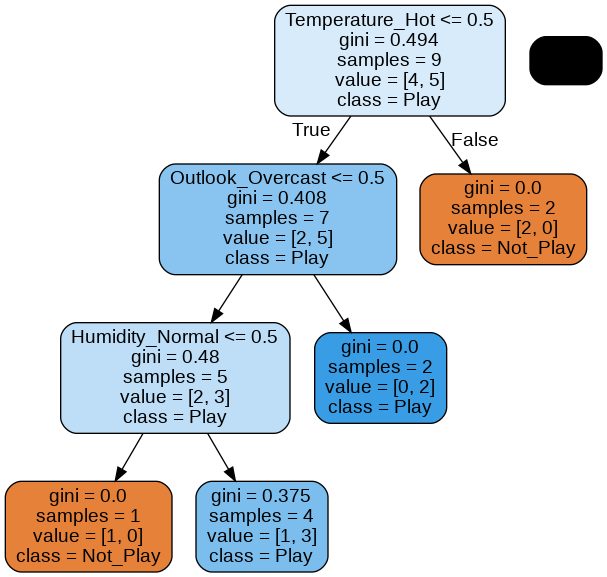

In [ ]:
# Export/Print a decision tree in DOT format.
print(tree.export_graphviz(clf_train, None))

#Create Dot Data
dot_data = tree.export_graphviz(clf_train, out_file=None, feature_names=list(X.columns.values), 
                                class_names=['Not_Play', 'Play'], rounded=True, filled=True)
 #Gini decides which attribute/feature should be placed at the root node, which features will act as internal nodes or leaf nodes
#Create Graph from DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [ ]:
from sklearn.metrics import accuracy_score
# Test model prediction input:
# Temperature =  hot, Humidity = normal,Outlook = sunny, Windy = false
#print(X_test)
print(y_test)
y_pred = clf.predict(X_test)
print("prediction",y_pred)
 
print("accuracy percentage",accuracy_score(y_test, y_pred))
print("correct predictions are",accuracy_score(y_test, y_pred, normalize=False),"out of ",len(y_pred))


12    1
2     1
3     1
13    0
10    1
Name: Play, dtype: int64
prediction [0 0 0 0 1]
accuracy percentage 0.4
correct predictions are 2 out of  5


The major disadvantage of Decision Trees is overfitting, especially when a tree is particularly deep. Fortunately, the more recent tree-based models including random forest and XGBoost are built on the top of decision tree algorithm and they generally perform better with a strong modeling technique and much more dynamic than a single decision tree. Therefore, understanding the concepts and algorithms behind Decision Trees thoroughly is super helpful to construct a good foundation of learning data science and machine learning.

### Summary: Now you should know:

1. How to construct a Decision Tree 
2. How to calculate ‘Entropy’ and ‘Information Gain’ 
3. How to calculate ‘Gini Index’ and ‘Gini Gain’ 
4. What is the best split? 
5. How to plot a Decision Tree Diagram in Python

In [ ]:
df = pd.read_csv("playgolf_data.csv")
df

,Outlook,Temperature,Humidity,Wind,PlayGolf
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder

# pandas.DataFrame.apply applies a function to given axis (0 by default)
# LabelEncoder encodes class labels with values between 0 and n-1
golf_data_num = df.apply(LabelEncoder().fit_transform)


In [ ]:
golf_data_num


,Outlook,Temperature,Humidity,Wind,PlayGolf
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
# DataFrame.iloc makes an access thourgh indices
# we want all rows and first 4 columns for features
# and the last column for labels
data = np.array(golf_data_num.iloc[:, :4])
target = np.array(golf_data_num.iloc[:, 4])
test_data=np.array(golf_data_num.iloc[9:14, :4])
test_target=np.array(golf_data_num.iloc[9:14, -1])

In [ ]:
golf_tree = tree.DecisionTreeClassifier()

golf_tree.fit(data, target);


In [ ]:
from sklearn.tree import export_text
feature_names=golf_data_num.columns.values[:4]
#feature_names.drop(['PlayGolf'],axis=1)
print(feature_names.tolist())
fnames=['Outlook', 'Temperature', 'Humidity', 'Wind']


r = export_text(golf_tree,feature_names=list(feature_names))
print(r)


['Outlook', 'Temperature', 'Humidity', 'Wind']
|--- Outlook <= 0.50
|   |--- class: 1
|--- Outlook >  0.50
|   |--- Humidity <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- class: 1
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- Outlook <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- Outlook >  1.50
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 1



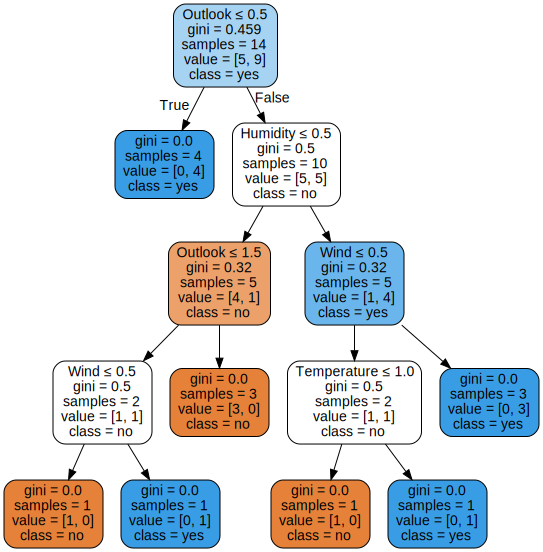

In [ ]:
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(golf_tree, out_file=None, 
                           feature_names=golf_data_num.columns.values[:4],  
                           class_names=["no", "yes"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph


In [ ]:
test_data

array([[1, 2, 1, 1],
       [2, 2, 1, 0],
       [0, 2, 0, 0],
       [0, 1, 1, 1],
       [1, 2, 0, 0]])

In [ ]:

pred_target = golf_tree.predict(test_data)
print("test",test_target)
print("prediction",pred_target)
 
print("accuracy percentage",accuracy_score(test_target, pred_target))
print("correct predictions are",accuracy_score(test_target, pred_target, normalize=False),"out of ",len(pred_target))


test [1 1 1 1 0]
prediction [1 1 1 1 0]
accuracy percentage 1.0
correct predictions are 5 out of  5
